In [116]:
import numpy as np
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
import time
from quimb import *

In [72]:
Nrep=100
r=2 # local Hilbert space dim

Lab=8
Lc=4
L=Lab+Lc

Nc=r**Lc
Nab=r**Lab
dims_ab = [r] *(2*Lab)

ent=np.zeros((Nrep,1+int(Lab/2)))

t_timer=time.time()
for i_n in range(int(Lab/2)):
    print(i_n)
    a_list=np.concatenate((np.arange(i_n+1),np.arange(i_n+1)+Lab))
    v1b=np.zeros(Nrep* r**(2*(i_n+1)))

    for i_r in range(Nrep):
#         print(i_r, end='\r')
        #### no symmetry
        X=np.random.randn(Nab,Nc)+1j*np.random.randn(Nab,Nc)

        mat=np.dot(X,np.matrix(X).H)
        rho= mat / np.trace(mat)
        mu, vec= np.linalg.eigh(rho)
        mu_inds= np.argwhere(mu>1e-4)[:,0]
        psi_n=np.zeros((Nab**2,1),dtype=np.complex128)
        for i_m in mu_inds:
            psi_n += mu[i_m]**0.5 *np.kron(vec[:,i_m],vec[:,i_m].conj())

#         r_aa=partial_trace(psi_n, dims=dims_ab, keep=a_list)
#         v1b[]=np.linalg.eigvalsh(r_aa)
        ent[i_r,i_n+1]= entropy_subsys(psi_n, dims=dims_ab, sysa=a_list, approx_thresh=8192)
#         print(a_list)
        
elapsed = time.time() - t_timer
print("Finished, elapsed time = %.2f " % (elapsed)+ "sec")

0
1
2
3
Finished, elapsed time = 10.46 sec


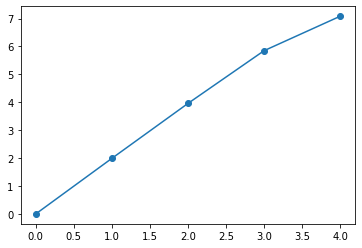

In [74]:
ent_avg=np.mean(ent,axis=0)

plt.figure()
plt.plot(np.arange(0,int(Lab/2)+1),ent_avg,'o-')
plt.show()

0
1
2


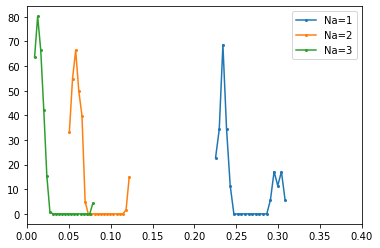

Finished, elapsed time = 4.57 sec


In [142]:
Nrep=10
r=2 # local Hilbert space dim

Lab=8
Lc=4
L=Lab+Lc

Nc=r**Lc
Nab=r**Lab
dims_ab = [r] *(2*Lab)

ent=np.zeros((Nrep,1+int(Lab/2)))

t_timer=time.time()
plt.figure()
for i_n in range(int(Lab/2)-1):
# for i_n in [1]:
    print(i_n)
    a_list=np.concatenate((np.arange(i_n+1),np.arange(i_n+1)+Lab))
    Na=r**(i_n+1)
    Naa=Na**2
    v1b=np.zeros(Nrep* Naa)
    tr_aa=np.zeros(Nrep)

    for i_r in range(Nrep):
#         print(i_r, end='\r')
        #### no symmetry
        X=np.random.randn(Nab,Nc)+1j*np.random.randn(Nab,Nc)

        mat=np.dot(X,np.matrix(X).H)
        rho= mat / np.trace(mat)
        mu, vec= np.linalg.eigh(rho)
        mu_inds= np.argwhere(mu>1e-20)[:,0]
        psi_n=np.zeros((Nab**2,1),dtype=np.complex128)
        for i_m in mu_inds:
            psi_n += mu[i_m]**0.5 *np.kron(vec[:,i_m],vec[:,i_m].conj())

        r_aa=partial_trace(psi_n, dims=dims_ab, keep=a_list)
#         tr_aa[i_r]=np.real(np.trace(r_aa))
        v1b[i_r*Naa:(i_r+1)*Naa]=np.linalg.eigvalsh(r_aa)
#         ent[i_r,i_n+1]= entropy_subsys(psi_n, dims=dims_ab, sysa=a_list, approx_thresh=8192)
#         print(a_list)

    num_bins = 20
    n, bin_edges = np.histogram(v1b, bins=num_bins)
#     n, bin_edges = np.histogram(v1b)

#     bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
    bins_center= (bin_edges[0:-1]+ bin_edges[1:])/2
    n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])
    plt.plot(bins_center,n,'o-',markersize=2,label='Na=%d' % (i_n+1))
#     plt.plot(tr_aa,'o')
#     print(np.sum(n)*(bin_edges[1]-bin_edges[0]))
    
plt.legend()
plt.xlim(0,0.4)
# plt.ylim(0,1)
plt.show()

elapsed = time.time() - t_timer
print("Finished, elapsed time = %.2f " % (elapsed)+ "sec")

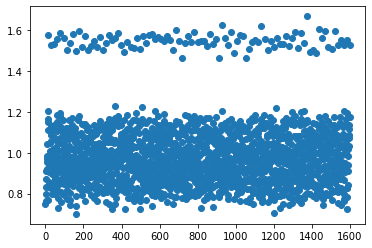

In [101]:
plt.figure()
plt.plot(v1b,'o')
plt.show()

In [112]:
a=1e-20
a**0.5

1e-10